## Note
1.Esc and Enter to Switch Command mode and Edit Mode:
    in command mode Doudle D to delete cell, A to create cell above, B to create cell below
2.Control+Z to return operation
3.Shift+Enter execute and move to next code cell
4.Control+Enter execute current cell


### Pandas -Series


In [68]:
import pandas as pd
import numpy as np

In [3]:
x = pd.Series([1, 2, 3])
x

0    1
1    2
2    3
dtype: int64

In [15]:
x.name = 'test'

In [10]:
x.dtype

dtype('int64')

In [9]:
x.values

array([1, 2, 3], dtype=int64)

In [11]:
x[0]

1

In [19]:
x.index = ['a', 'b', 'c']
x

a    1
b    2
c    3
Name: test, dtype: int64

In [20]:
pd.Series({'a': 1,
           'b': 2,
           'c': 3},
          name = 'test1')

a    1
b    2
c    3
Name: test1, dtype: int64

In [23]:
y = pd.Series(x, index=['a', 'd', 'e', 'f'])
y

a    1.0
d    NaN
e    NaN
f    NaN
Name: test, dtype: float64

In [30]:
x['a']


1

In [31]:
x[0]

1

In [33]:
x.iloc[0] # lioc only takes the default int as inxdex

TypeError: Cannot index by location index with a non-integer key

In [34]:
x[0:2] # the last one excluded

a    1
b    2
Name: test, dtype: int64

In [35]:
x['a':'c'] # last one included

a    1
b    2
c    3
Name: test, dtype: int64

In [36]:
x.iloc[0:2] # same with x[0:2]

a    1
b    2
Name: test, dtype: int64

## Conditional selection

In [38]:
x > 1

a    False
b     True
c     True
Name: test, dtype: bool

In [41]:
x[x>1] #  equal to  x['False", 'True', 'True']

b    2
c    3
Name: test, dtype: int64

In [43]:
x[x > x.mean()]

c    3
Name: test, dtype: int64

In [45]:
x[(x > x.mean() - x.std()/2) & (x < x.mean() + x.std()/2)]
# ~not
# | or
# & and

b    2
Name: test, dtype: int64

## Dataframe
Dataframe can be considered as combination of multi series

In [90]:
df = pd.DataFrame({'a':[1, 2, 3],
 'b': [4, 5, 6],
 'c': [7, 8, 9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [102]:
df.index = ['test1', 'test2', 'test3']
df

,c,b,a
test1,1,4,7
test2,2,5,8
test3,3,6,9


In [91]:
df.columns=['c', 'b', 'a'] # change the columns name in order but not the order of data
df

,c,b,a
0,1,4,7
1,2,5,8
2,3,6,9


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, test1 to test3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c       3 non-null      int64
 1   b       3 non-null      int64
 2   a       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [54]:
df.shape

TypeError: 'tuple' object is not callable

In [56]:
df.describe()

,c,b,a
count,3.0,3.0,3.0
mean,2.0,5.0,8.0
std,1.0,1.0,1.0
min,1.0,4.0,7.0
25%,1.5,4.5,7.5
50%,2.0,5.0,8.0
75%,2.5,5.5,8.5
max,3.0,6.0,9.0


In [60]:
df.dtypes

c    int64
b    int64
a    int64
dtype: object

In [ ]:
df.dtypes.value_counts()

### DataFrame Select data

#### select column

In [72]:
df['a'] # return column a

test1    7
test2    8
test3    9
Name: a, dtype: int64

#### select row

In [73]:
df.loc['test1']
df.iloc[0]
# df[0] won't run
#return row test1/row 1
# df['test1'] won't run


c    1
b    4
a    7
Name: test1, dtype: int64

In [77]:
df.loc['test1', ['a','b']] # select row and columns

a    7
Name: test1, dtype: int64

In [80]:
df['a']['test1':'test3'] # select columns abd rows

test1    7
test2    8
test3    9
Name: a, dtype: int64

#### Conditional Select

In [83]:
df['a'] > 7

test1    False
test2     True
test3     True
Name: a, dtype: bool

In [85]:
df.loc[df['a'] > 7, ['b', 'c']] # return column b and c that in which row the value in column a is > 7.

,b,c
test2,5,2
test3,6,3


#### Drop value

In [88]:
df.drop('test1', inplace=False) # return a new DataFrame the origin remain the same default is False

In [89]:
df.drop('test1', inplace=True) # won't generate output but the origin dataframe will be change

,c,b,a
test2,2,5,8
test3,3,6,9


Drop columns

In [108]:
df.drop(['a', 'b'], axis=1) # asix  = 0 to drop rows 1 to drop columns
df.drop(columns=['a','b'])
df.drop(['a', 'b'], axis='columns')
# all same above

,c
test1,1
test2,2
test3,3


Drop rows

In [111]:
df.drop(['test1', 'test2'], axis=0)  # asix  = 0 to drop rows 1 to drop columns
df.drop(['test1', 'test2'])
df.drop(['test1', 'test2'], axis='rows')

,c,b,a
test3,3,6,9


### Rename Columns and rows(indexes)

In [113]:
df.rename(
    columns= {
        'a' : 'aa',
        'b' : 'bb',
        'c' : 'cc'},
    index= {
        'test1' : 'test11',
        'test2' : 'test22',
        'test3' : 'test33'

    }
)

,cc,bb,aa
test11,1,4,7
test22,2,5,8
test33,3,6,9


In [114]:
df.rename(index=str.upper)

,c,b,a
TEST1,1,4,7
TEST2,2,5,8
TEST3,3,6,9


In [115]:
df.rename(index=lambda x : x.upper())

,c,b,a
TEST1,1,4,7
TEST2,2,5,8
TEST3,3,6,9


### Add value

In [166]:
df=df.append(pd.Series({'a':np.nan, 'b':None},
                    name = 'test4')) # create a new column even though the index already exist.

In [182]:
df.loc['test4','c'] = 12 # change the value for a cell, if the index not exist, it will create a new row

In [147]:
#df.drop(['test4'], inplace=True)
df

,c,b,a
test1,1.0,4.0,7.0
test2,2.0,5.0,8.0
test3,3.0,6.0,9.0
test4,12.0,NaN,NaN


### Data Clean

In [ ]:
pd.isna(None)
#pd.isna(np.nan)
#pd.isnull(None)
#pd.isnull(np.nan)
# isna, isnull will return same boolean value for None and np.nan
# same as notnull and notna

#### Check how many NA are in the DF


In [197]:
pd.isnull(df).sum() #check each column

c    0
b    1
a    1
dtype: int64

In [149]:
sum(pd.isnull(df).sum()) # check the DataFrame

2

In [184]:
df.dropna(axis=0, how=any, thresh= 3) # drop the row is the row contain na/none
# 0 is for row, 1 is to drop any column that contains NA
# how= any as default, how = all means drop only when the entire row/column is NA
# thresh = 3 means that the row/column containing at least 3 notnull value can be kept


,c,b,a
test1,1.0,4.0,7.0
test2,2.0,5.0,8.0
test3,3.0,6.0,9.0


,c,b,a
test1,1.0,4.0,7.0
test2,2.0,5.0,8.0
test3,3.0,6.0,9.0
test4,NaN,NaN,NaN


#### Fill the NA value


In [185]:
df.fillna(df.mean()) #fill the NA cell by the mean of that column

,c,b,a
test1,1.0,4.0,7.0
test2,2.0,5.0,8.0
test3,3.0,6.0,9.0
test4,12.0,5.0,8.0


In [190]:
df.fillna(method='ffill', axis=1)
# ffill: fill the NA with the value above
# bfill: fill the NA with the value below, if the value below it NA as well, the NA above will remain
# axis=1: fill by the value in each row, axis=0: each column
df.fillna(method='bfill', axis=1)

,c,b,a
test1,1.0,4.0,7.0
test2,2.0,5.0,8.0
test3,3.0,6.0,9.0
test4,12.0,12.0,12.0


### Invalid value

In [207]:
# value > 10 is invalid
#df['a'][1] = 7
df.nunique() # the count of unique value in each column

c    4
b    3
a    2
dtype: int64

In [210]:
df['a'].unique() # unique value in specific column
df['a'].value_counts() # count of each unique value in specific column

7.0    2
9.0    1
Name: a, dtype: int64

#### replace invalid value

In [225]:
df['c'].replace(12,10)

test1     1.0
test2     2.0
test3     3.0
test4    10.0
Name: c, dtype: float64

In [229]:
df['a'].replace({np.nan: 10, 9:10})


test1     7.0
test2     7.0
test3    10.0
test4    10.0
Name: a, dtype: float64

### duplicate and drop


In [ ]:
df.duplicated() # return True if the entire row is same

In [ ]:
df.drop_duplicates(keep=False)
# False: drop all the dupilicate values
# True:  remain one left

In [231]:
df.duplicated(subset=['a','b']) # return True if same value exist in specific column

test1    False
test2    False
test3    False
test4    False
dtype: bool

## String Handling

### Split String

In [232]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [233]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [234]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [238]:
df=df['Data'].str.split('_', expand=True) # Creat a Dataframe for splitted data

KeyError: 'Data'

In [241]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [243]:
df['Year'].str.contains('\?')
#contains takes a regex/pattern as first value, so we need to escape the ? symbol as it has a special meaning for these patterns. Regular letters don't need escaping:

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [247]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [248]:
df['Country'].str.strip() # remove  empty space from both side
# to remove space inside use .replace

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [249]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [256]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

C:\Users\Timmy‘s\AppData\Local\Temp/ipykernel_29072/3052170041.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [255]:
df['Year'].str.replace('\?', '')

C:\Users\Timmy‘s\AppData\Local\Temp/ipykernel_29072/4133643986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace('\?', '')


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
x = np.arange(-10, 11)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

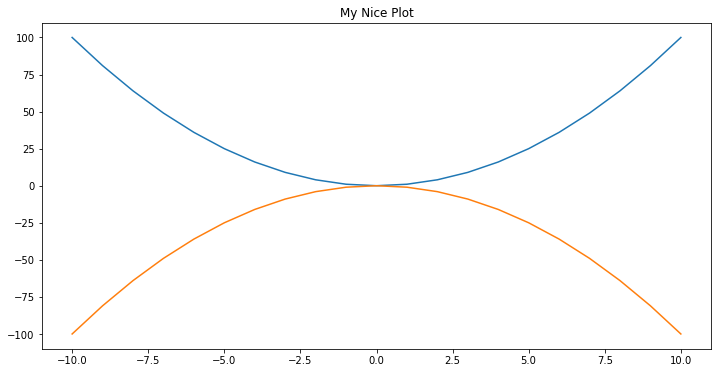

In [259]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

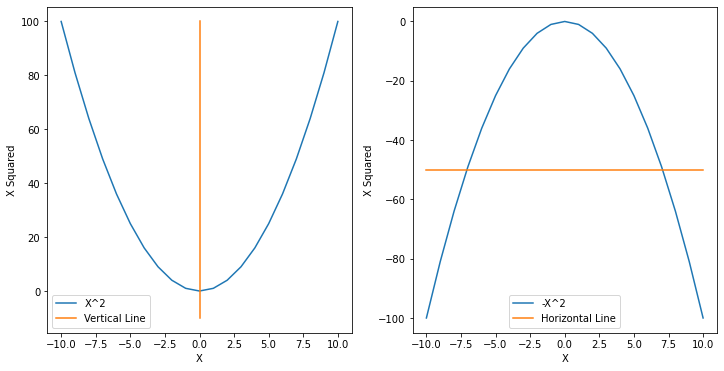

In [261]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

In [7]:
pip install pymssql -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymssql

In [9]:
connect = pymssql.connect(
    server = '127.0.0.1',
    database = 'Master')  # 建立连接
if connect:
    print("连接成功!")

连接成功!


In [13]:
cursor = connect.cursor()

In [14]:
cursor.execute("""select top 10 *
from dbo.Daily_Buy """)
result = cursor.fetchall()
result

[('220407190838106',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  56.0,
  348.32000732421875,
  23343.279930114746,
  3743.680000305176),
 ('220407190855456',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  39.66999816894531,
  246.74000549316406,
  23343.279930114746,
  3743.680000305176),
 ('220407191231200',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  48.22999954223633,
  300.0,
  23343.279930114746,
  3743.680000305176),
 ('220407191252734',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  50.0,
  311.0,
  23343.279930114746,
  3743.680000305176),
 ('220407191257136',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  103.69000244140625,
  645.0,
  23343.279930114746,
  3743.680000305176),
 ('220407191327101',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  33.400001525878906,
  207.74000549316406,
  23343.279930114746,
  3743.680000305176),
 ('220407191427396',
  6.21999979019165,
  datetime.date(2022, 4, 7),
  33.20000076293945,
  206.5,
  23343.279930114746,

In [83]:
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6
0,220407190838106,6.22,2022-04-07,56.000000,348.320007,23343.27993,3743.68
1,220407190855456,6.22,2022-04-07,39.669998,246.740005,23343.27993,3743.68
2,220407191231200,6.22,2022-04-07,48.230000,300.000000,23343.27993,3743.68
3,220407191252734,6.22,2022-04-07,50.000000,311.000000,23343.27993,3743.68
4,220407191257136,6.22,2022-04-07,103.690002,645.000000,23343.27993,3743.68
5,220407191327101,6.22,2022-04-07,33.400002,207.740005,23343.27993,3743.68
6,220407191427396,6.22,2022-04-07,33.200001,206.500000,23343.27993,3743.68
7,220407191612301,6.22,2022-04-07,35.000000,217.699997,23343.27993,3743.68
8,220407191802533,6.22,2022-04-07,33.000000,205.259995,23343.27993,3743.68
9,220407191814259,6.22,2022-04-07,131.000000,814.820007,23343.27993,3743.68


In [90]:
df = pd.read_sql("select sum(profit) from dbo.DaliyProfit", connect)
df

,
0,822.0


In [11]:
connect = pymssql.connect(
    server = '(local)',
    database = 'Master')  # 建立连接
if connect:
    print("连接成功!")

连接成功!


In [12]:
connect = pymssql.connect(
    server = '8.210.194.242',
    port =1433,
    user = 'sa',
    password = '123456',
    database = 'Master')  # 建立连接
if connect:
    print("连接成功!")

连接成功!


###Excel to HTML

In [1]:
import pandas as pd
df = pd.read_excel('C:/Users/Timmy‘s/Desktop/OTC_Profit.xlsx',sheet_name=None)
df['JP利润表'].to_html('C:/Users/Timmy‘s/Desktop/新建文件夹 (2)//JP.html', header=True, index=False,encoding='utf-8')
df['WLB利润表'].to_html('C:/Users/Timmy‘s/Desktop/新建文件夹 (2)//WLB.html', header=True, index=False,encoding='utf-8')

,111,买入数量,买入金额,卖出数量,卖出金额,利润
0,2022/5/29,1118.43990,7190.7998,0.0000,0.0000,90.244629
1,2022/5/30,4876.96000,31640.3500,4536.3203,30000.0000,577.214840
2,2022/5/31,5247.60990,33802.1290,1001.0000,6616.6099,459.911620
3,2022/6/1,670.52002,4257.8701,5906.9199,38400.0000,53.164063
4,2022/6/2,3151.67990,20032.6890,3407.5500,22166.0000,467.595700
5,2022/6/3,2605.71000,16654.5390,2700.9800,17591.1700,316.421880
